### Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?
Ans. In machine learning algorithms, kernel functions play a crucial role in transforming the input data into a higher-dimensional feature space, making it possible to learn complex patterns or decision boundaries. Polynomial functions are a specific type of kernel function used in Support Vector Machines (SVM) and other kernel-based algorithms.

A polynomial kernel function computes the similarity between data points by taking the dot product of their transformed feature vectors in a higher-dimensional space. The kernel trick allows SVMs to work efficiently in the original feature space without explicitly computing the transformation. The degree of the polynomial kernel determines the degree of the polynomial used in the feature space transformation.

The polynomial kernel is defined as: K(x, y) = (gamma * <x, y> + coef0) ** degree, where <x, y> is the dot product between the input vectors x and y.

### Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

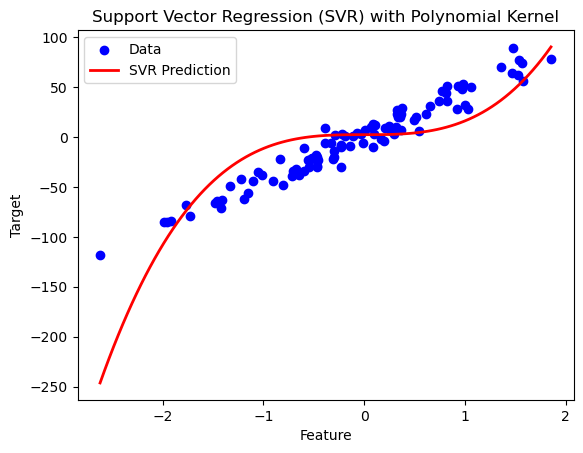

In [2]:
from sklearn.datasets import make_regression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

# Create sample data for regression
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Initialize the SVR with a polynomial kernel
svr = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.1)

# Fit the SVR model to the data
svr.fit(X, y)

# Predict the target values for new data points
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = svr.predict(X_test)

# Plot the SVR regression curve
plt.scatter(X, y, label='Data', color='blue')
plt.plot(X_test, y_pred, label='SVR Prediction', color='red', linewidth=2)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Support Vector Regression (SVR) with Polynomial Kernel')
plt.legend()
plt.show()


### Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?
Ans. The epsilon parameter in SVR defines the margin of tolerance for the deviation of predicted values from the actual target values within the training set. As epsilon increases, the number of support vectors tends to decrease. Larger epsilon allows more data points to be considered within the margin, leading to fewer support vectors. Conversely, smaller epsilon requires more data points to be exactly on or within the margin, leading to more support vectors.


### Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?
Ans. Kernel function: The choice of the kernel function affects the flexibility of the SVR model in learning complex patterns from the data. Different kernel functions, such as linear, polynomial, radial basis function (RBF), etc., are suitable for different types of data and problem complexities.

C parameter: The C parameter controls the trade-off between maximizing the margin and minimizing the training errors. A smaller C value allows for a larger margin and more errors (soft margin), making the model more tolerant of misclassifications. A larger C value leads to a narrower margin and fewer errors (hard margin), making the model more sensitive to misclassifications.

Epsilon parameter: The epsilon parameter defines the width of the margin around the regression line. A larger epsilon allows more points to lie within the margin, leading to a more flexible model. Smaller epsilon forces the model to fit the data more closely, making it less flexible.

Gamma parameter: The gamma parameter is specific to the RBF kernel and determines the influence of each training example on the regression. A larger gamma value results in a more localized decision boundary, making the model sensitive to nearby points and potentially overfitting the data. Smaller gamma leads to a smoother decision boundary and a more general model.

The choice of these parameters heavily depends on the specific problem and the nature of the data. It is essential to tune these parameters using techniques like cross-validation to find the best combination that yields optimal performance on unseen data. Incorrect parameter values might lead to underfitting or overfitting, impacting the model's ability to generalize well to new data.

### Q5. Assignment:
* Import the necessary libraries and load the dataseg
* Split the dataset into training and testing setZ
* Preprocess the data using any technique of your choice (e.g. scaling, normaliMationK
* Create an instance of the SVC classifier and train it on the training datW
* hse the trained classifier to predict the labels of the testing datW
* Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy, precision, recall, F1-score)
* Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to improve its performance
* Train the tuned classifier on the entire dataset
* Save the trained classifier to a file for future use.

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data - Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SVC classifier
svc_classifier = SVC()

# Train the SVC classifier on the training data
svc_classifier.fit(X_train_scaled, y_train)

# Use the trained classifier to predict the labels of the testing data
y_pred = svc_classifier.predict(X_test_scaled)

# Evaluate the performance of the classifier using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVC classifier: {accuracy:.2f}")

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train the tuned classifier on the entire dataset
tuned_svc_classifier = grid_search.best_estimator_
tuned_svc_classifier.fit(X, y)

# Save the trained classifier to a file for future use
joblib.dump(tuned_svc_classifier, 'tuned_svc_classifier.pkl')

# To load the classifier from the file in the future
# tuned_svc_classifier = joblib.load('tuned_svc_classifier.pkl')

Accuracy of the SVC classifier: 1.00
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.9583333333333334


['tuned_svc_classifier.pkl']